In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
df = pd.read_csv("gs://datastorageicici/Day2/train_final.csv")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df['x39']=df['x39'].astype('category')
#Checking Nulls
df.columns[df.isnull().any()]

Index(['x35', 'x33', 'x31', 'x1', 'x29', 'x30', 'x38'], dtype='object')

In [3]:
## Univariate Analysis
def univ(df,remlist=list()):
    out=df.select_dtypes(include=np.number).columns
    univlist=list(set(out)-set(remlist))
    df_numeric=df[univlist]
    des1=df_numeric.describe(percentiles=[.1, .2, .3, .4, .5, .6, .7, .8,.9,.99,1],include = 'all').T
    des2 =((df_numeric.isnull().sum())*100/df_numeric.shape[0]).to_frame(name ='missing')
    df1=pd.concat([des1, des2],axis=1)
    df2=df1.drop('count', 1)
    return df2

In [4]:
univ(df,['id'])

,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,99%,100%,max,missing
x17,240.72,879.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,670.00,4145.25,24782.00,24782.00,0.00
x9,913.68,1432.88,0.00,0.00,0.00,100.00,244.00,433.00,681.00,1010.00,1500.00,2431.00,6201.05,81000.00,81000.00,0.00
x14,0.22,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,34.00,34.00,0.00
x2,0.91,2.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00,13.00,61.00,61.00,0.00
x21,7.47,129.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,135.00,17337.05,17337.05,0.00
x22,0.02,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,20.00,20.00,0.00
x38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21
x23,14.61,292.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,245.00,26820.00,26820.00,0.00
x20,0.01,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,19.00,0.00
x33,2249.26,13780.86,0.00,0.00,50.00,150.00,280.00,442.00,677.24,1060.00,1764.00,3814.67,31011.78,1777795.30,1777795.30,0.02


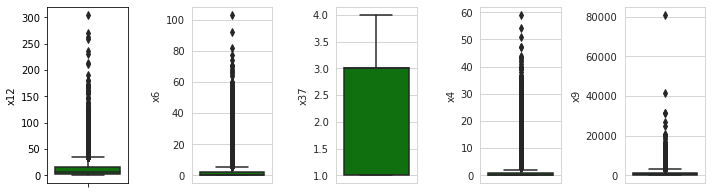

In [5]:
# Another method plotting Boxplot
cols=['x12','x6','x37','x4','x9']
df01=df[cols]
plt.figure(figsize=(12,16)) ##adjust the values in figsize(x,y) for width and height of the figure and thus the sub-plots.
for i in range(0,len(cols)):
    plt.subplot(6,6,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df01[cols[i]],color='green',orient='v')
    plt.tight_layout()

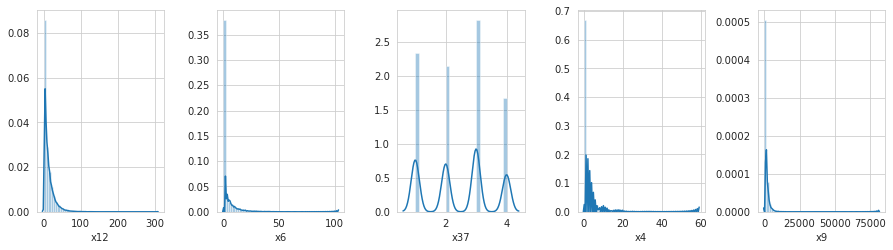

In [6]:
# Distribution of Variables
fig = plt.figure(figsize=(15,20))
for i, c in enumerate(cols):
    ax = plt.subplot(6,6,i+1)
    sns.distplot(df[c].dropna())
fig.tight_layout()

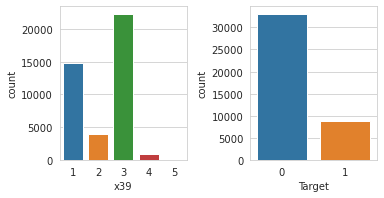

In [7]:
# Plotting the categorical Variable
cat_cols=['x39','Target']
fig = plt.figure(figsize=(16,16))
for i, c in enumerate(cat_cols):
    ax = plt.subplot(6,6,i+1)
    sns.countplot(x=df[c])
fig.tight_layout()

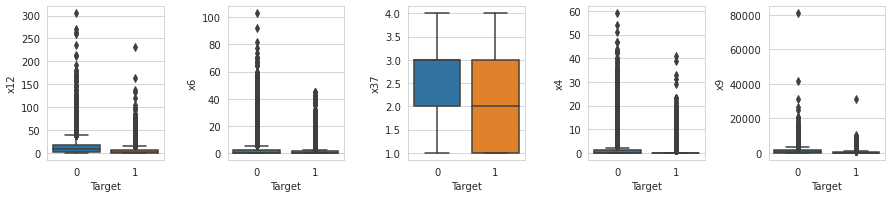

In [8]:
## Bivariate Analysis
# Continuous variables vs Categorical Target varaible
fig = plt.figure(figsize=(15,16))
for i, c in enumerate(cols):
    ax = plt.subplot(6,6,i+1)
    sns.boxplot(x=df["Target"], y=df[c])
fig.tight_layout()

In [9]:
# Minimum and Maximum comparison from the box plot
des1=df[cols].describe(percentiles=[.25, .5, .75],include = 'all').T
des1['bmin']=des1["25%"]-1.5*(des1["75%"]-des1["25%"])
des1['bmax']=des1["75%"]+1.5*(des1["75%"]-des1["25%"])
des1


,count,mean,std,min,25%,50%,75%,max,bmin,bmax
x12,41896.00,10.87,14.53,0.00,2.00,6.00,15.00,305.00,-17.50,34.50
x6,41896.00,2.32,5.67,0.00,0.00,0.00,2.00,103.00,-3.00,5.00
x37,41896.00,2.43,1.07,1.00,1.00,3.00,3.00,4.00,-2.00,6.00
x4,41896.00,1.41,3.68,0.00,0.00,0.00,1.00,59.00,-1.50,2.50
x9,41896.00,913.68,1432.88,0.00,10.00,433.00,1240.25,81000.00,-1835.38,3085.62


In [10]:
# Cross tabs
pd.crosstab(df['x39'], df['Target'])

Target,0,1
x39,,
1,11288,3467
2,2989,917
3,18207,4184
4,662,179
5,2,1


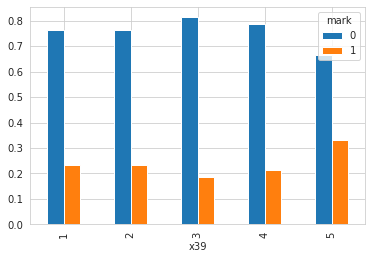

In [11]:
############### crosstab #############
ct=pd.crosstab(df['x39'], df['Target']).apply(lambda r: r/r.sum(), axis=1)
ct.plot.bar(stacked=False)
plt.legend(title='mark')
plt.show()

In [12]:
# Cramer's V
ct=pd.crosstab(df['Target'], df['x39'])
def cramers_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
cramersv = cramers_stat(ct)
cramersv

0.05836510354202788

In [13]:
############### correlation ############
out=df.select_dtypes(include=np.number).columns
pd.set_option("display.max_columns", 50) # Display all columns
remlist=['id','Target','x38','x28']
univlist=list(set(out)-set(remlist))
df_numeric=df[univlist]
corr = df_numeric.corr()
corr

,x17,x9,x14,x2,x21,x22,x23,x20,x33,x32,x31,x7,x11,x16,x1,x4,x34,x19,x24,x37,x36,x15,x5,x29,x3,x10,x12,x8,x13,x18,x35,x30,x6
x17,1.00,0.00,0.69,-0.02,0.02,0.01,0.01,0.01,0.04,0.03,0.07,0.00,0.00,0.74,0.07,-0.01,0.04,0.00,0.01,0.07,0.01,0.85,0.03,-0.01,0.03,-0.06,-0.07,-0.06,0.84,0.85,0.08,0.04,-0.01
x9,0.00,1.00,-0.03,0.01,0.04,0.05,0.02,0.02,0.11,0.62,0.19,0.39,0.69,0.01,0.05,0.08,0.35,0.01,0.04,0.41,0.67,0.02,0.05,0.29,0.06,0.70,0.65,0.39,-0.02,-0.01,0.24,0.31,0.06
x14,0.69,-0.03,1.00,-0.01,0.00,0.00,0.00,0.01,0.05,0.04,0.04,0.01,-0.00,0.42,0.04,-0.02,0.12,0.00,0.00,0.03,-0.01,0.35,0.01,-0.00,0.00,-0.05,-0.05,-0.03,0.82,0.84,0.02,0.13,-0.02
x2,-0.02,0.01,-0.01,1.00,0.01,0.01,0.00,0.00,0.25,0.31,0.30,0.01,0.02,-0.03,0.38,0.58,0.42,0.00,0.01,0.16,0.18,-0.02,0.43,0.27,0.31,-0.01,0.00,0.03,-0.01,-0.03,0.25,0.36,0.85
x21,0.02,0.04,0.00,0.01,1.00,0.78,0.73,0.46,0.02,0.05,0.04,0.01,0.02,0.03,-0.00,0.01,0.03,0.38,0.71,0.02,0.05,0.03,0.01,0.03,0.01,0.03,0.02,0.01,0.00,0.02,0.05,0.03,0.01
x22,0.01,0.05,0.00,0.01,0.78,1.00,0.55,0.49,0.02,0.07,0.04,0.01,0.03,0.02,-0.00,0.02,0.05,0.27,0.84,0.03,0.07,0.02,0.01,0.04,0.01,0.04,0.04,0.03,0.00,0.01,0.05,0.04,0.02
x23,0.01,0.02,0.00,0.00,0.73,0.55,1.00,0.67,0.03,0.06,0.04,0.02,0.03,0.01,0.00,0.00,0.09,0.91,0.71,0.02,0.03,0.02,0.01,0.01,0.01,0.02,0.04,0.07,0.00,0.01,0.03,0.09,0.01
x20,0.01,0.02,0.01,0.00,0.46,0.49,0.67,1.00,0.03,0.07,0.03,0.03,0.03,0.01,-0.01,-0.00,0.13,0.62,0.88,0.01,0.02,0.01,-0.00,0.01,-0.00,0.01,0.05,0.10,0.01,0.01,0.02,0.14,-0.00
x33,0.04,0.11,0.05,0.25,0.02,0.02,0.03,0.03,1.00,0.15,0.90,0.25,0.23,0.02,0.84,0.14,0.23,0.03,0.03,0.08,0.08,0.02,0.47,0.08,0.31,0.03,0.05,0.08,0.05,0.04,0.34,0.22,0.21
x32,0.03,0.62,0.04,0.31,0.05,0.07,0.06,0.07,0.15,1.00,0.24,0.19,0.39,0.03,0.15,0.36,0.80,0.05,0.08,0.52,0.93,0.02,0.17,0.47,0.17,0.87,0.92,0.75,0.03,0.04,0.28,0.74,0.38


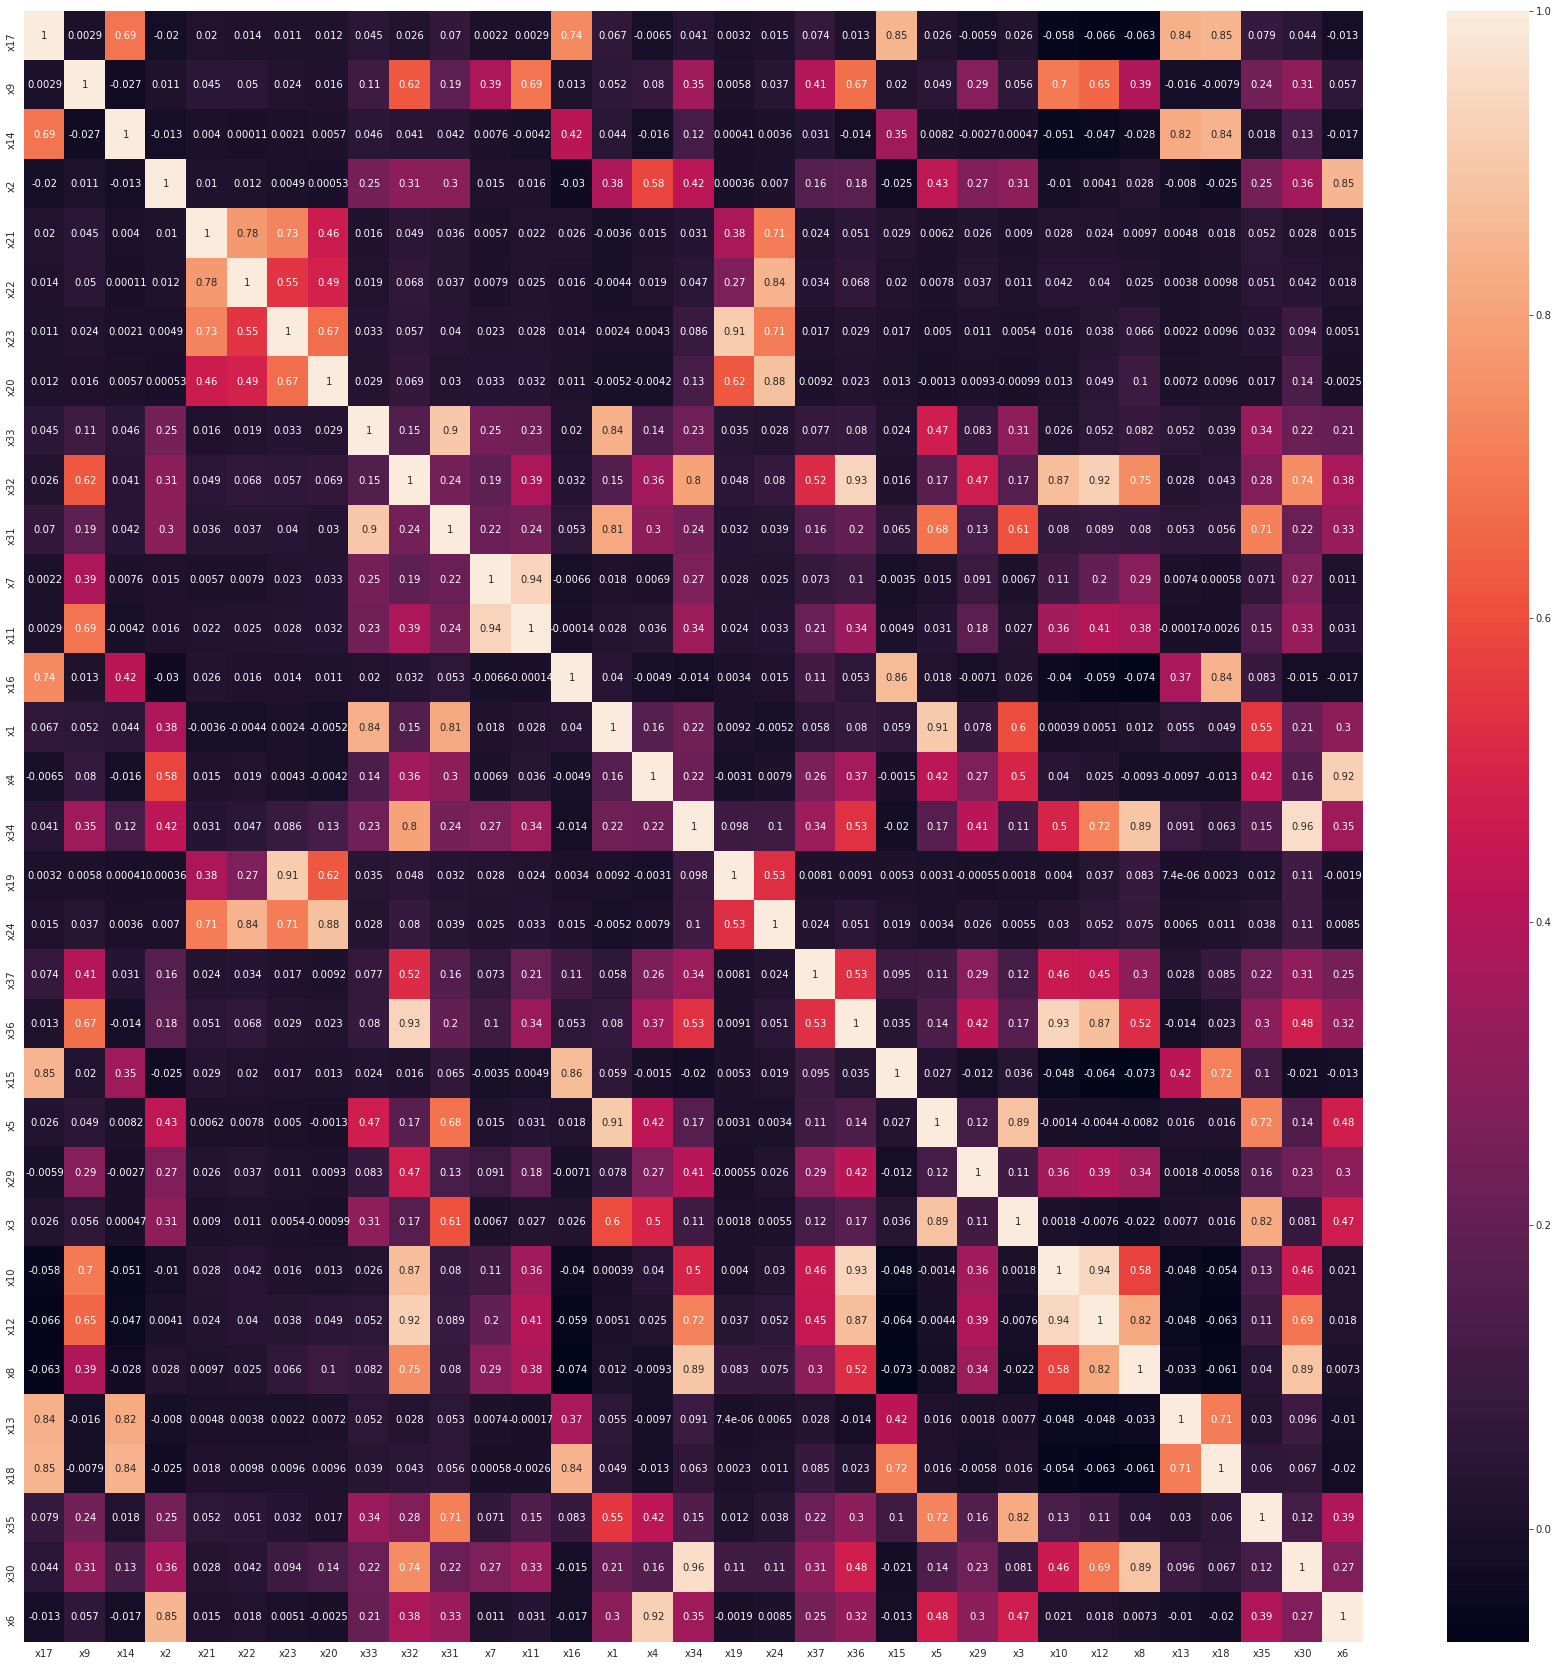

In [14]:
# Correlation heatmap
plt.figure(figsize = (30,30))
ax=sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)